In [9]:
from value_iteration import *
from policy_iteration import *
from policy_iteration_linear import *
from matplotlib import pyplot as plt
pd.set_option('precision', 5) 

In [10]:
df_results = pd.DataFrame(columns=['board_size', 'v_n_v_iter', 'v_runtime', 'p_n_v_iter', 'p_n_p_iter', 'p_runtime', 'pl_n_v_iter', 'pl_n_p_iter', 'pl_runtime'])
for i in range(1, 7):

    b_size, v_n_v_iter, v_runtime = ValueIteration(
        '../inputs/i{}.txt'.format(i),
        threshold=0.01,
        use_arrow=True,
        verbose=False
    ).run()
    
    b_size, p_n_v_iter, p_n_p_iter, p_runtime = PolicyIteration(
        '../inputs/i{}.txt'.format(i), 
        threshold=0.01, 
        init_policy_direction=1,
        improve_p_with_v=True,
        use_arrow=True,
        verbose=False
    ).run()

    b_size, pl_n_v_iter, pl_n_p_iter, pl_runtime = PolicyIterationLinear(
        '../inputs/i{}.txt'.format(i), 
        threshold=0.01, 
        init_policy_direction=1,
        improve_p_with_v=True,
        use_arrow=True,
        verbose=False
    ).run()
    
    df_results = df_results.append(pd.DataFrame({
        'board_size': [b_size], 
        'v_n_v_iter': [v_n_v_iter], 
        'v_runtime': [v_runtime], 
        'p_n_v_iter': [p_n_v_iter], 
        'p_n_p_iter': [p_n_p_iter],
        'p_runtime': [p_runtime],
        'pl_n_v_iter': [pl_n_v_iter], 
        'pl_n_p_iter': [pl_n_p_iter],
        'pl_runtime': [pl_runtime]
    }))

↑  ↑  →  →  →  →  ↑  ↑  ↑  ↑  ...  →  ↑  ↑  ↑  ↑  ↑  ↑  ↑  ↑     ↑
9   ↑  ↑  ↑  →  ↑  ↑  ↑  ↑  ↑  0  ...  →  ↑  ↑  ↑  ↑  ↑  ↑  ↑  ↑     0
10  ↑  ↑  ↑  →  ↑  ↑  ↑  ↑  →  →  ...  →  →  ↑  ↑  ↑  ↑  ↑  ↑  ↑     ←
11  ↑  ↑  →  →  →  ↑  ↑  →  →  →  ...  →  →  ↑  ↑  ↑  ↑  ↑  ↑  ↑     ←
12  ↑  →  →  →  →  →  →  →  →  →  ...  →  →  →  ↑  ↑  ↑  ↑  ↑  ↑     ↑
13  →  →  →  →  →  →  →  →  →  →  ...  →  →  →  →  ↑  ↑  ↑  ↑  ↑     ↑
14  →  →  →  →  →  →  →  →  →  →  ...  →  →  →  →  →  ↑  ↑  ↑  ↑     ↑
15  →  →  →  →  →  →  →  →  →  →  ...  →  →  →  →  →  ↓  ↓  ↓  ↓     ↓
16  ↓  →  →  →  →  →  →  →  →  →  ...  →  →  →  →  ↓  ↓  ↓  ↓  ↓     ↓
17  ↓  →  →  →  →  →  →  →  →  →  ...  →  →  →  ↓  ↓  ↓  ↓  ↓  ↓     ←
18  ↓  ↓  →  →  →  ↓  ↓  ↓  →  →  ...  →  →  ↓  ↓  ↓  ↓  ↓  ↓  ↓     ←
19  ↓  ↓  ↓  →  ↓  ↓  ↓  ↓  ↓  0  ...  →  →  ↓  ↓  ↓  ↓  ↓  ↓  ↓     0
20  ↓  ↓  ↓  →  →  →  ↓  ↓  ↓  ↓  ...  →  ↓  ↓  ↓  ↓  ↓  ↓  ↓  ↓     ↓
21  ↓  ↓  →  →  →  →  →  →  →  →  ...  →  →  ↓  ↓  ↓  ↓  ↓  ↓  ↓     ↓
22  ↓  →  

In [27]:
df_results = df_results.set_index(['board_size'])
df_results.to_csv('../results/results_1.csv', float_format='%.5f')
df_results

,v_n_v_iter,v_runtime,p_n_v_iter,p_n_p_iter,p_runtime,pl_n_v_iter,pl_n_p_iter,pl_runtime
board_size,,,,,,,,
6,35,0.01527,19,5,0.01469,0,1,0.00413
7,17,0.00915,52,5,0.02330,0,5,0.01369
10,44,0.04054,151,4,0.08571,0,4,0.02571
20,55,0.33576,184,8,0.65270,0,10,0.36991
30,62,0.83874,218,10,1.78188,0,10,0.95684
100,82,12.76358,621,17,45.94693,0,18,98.81403


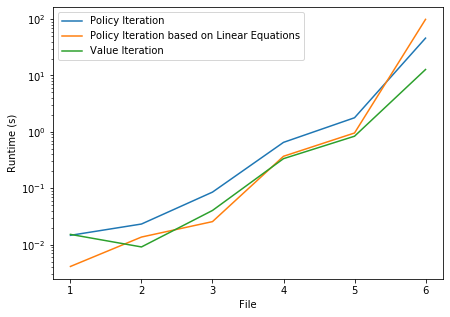

In [28]:
plt.figure(figsize=(7, 5))
x = range(1, 7)
plt.plot(x, df_results['p_runtime'], label='Policy Iteration')
plt.plot(x, df_results['pl_runtime'], label='Policy Iteration based on Linear Equations')
plt.plot(x, df_results['v_runtime'], label='Value Iteration')
plt.yscale('log')
plt.xlabel('File')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()

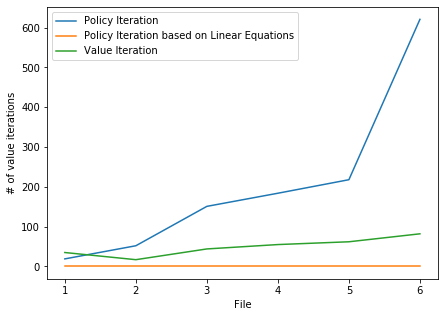

In [30]:
plt.figure(figsize=(7, 5))
x = range(1, 7)
plt.plot(x, df_results['p_n_v_iter'], label='Policy Iteration')
plt.plot(x, df_results['pl_n_v_iter'], label='Policy Iteration based on Linear Equations')
plt.plot(x, df_results['v_n_v_iter'], label='Value Iteration')
# plt.yscale('log')
plt.xlabel('File')
plt.ylabel('# of value iterations')
plt.legend()
plt.show()

In [47]:
df_results = pd.DataFrame(columns=['board_size', 'p_i_n_v_iter', 'p_i_n_p_iter', 'p_i_runtime', 'p_n_v_iter', 'p_n_p_iter', 'p_runtime'])
for i in range(1, 6):

    b_size, p_i_n_v_iter, p_i_n_p_iter, p_i_runtime = PolicyIteration(
        '../inputs/i{}.txt'.format(i), 
        threshold=0.01, 
        init_policy_direction=1,
        use_arrow=True,
        verbose=False
    ).run()
    
    b_size, p_n_v_iter, p_n_p_iter, p_runtime = PolicyIteration(
        '../inputs/i{}.txt'.format(i), 
        threshold=0.01, 
        use_arrow=True,
        verbose=False
    ).run()
    
    df_results = df_results.append(pd.DataFrame({
        'board_size': [b_size], 
        'p_i_n_v_iter': [p_i_n_v_iter], 
        'p_i_n_p_iter': [p_i_n_p_iter], 
        'p_i_runtime': [p_i_runtime], 
        'p_n_v_iter': [p_n_v_iter], 
        'p_n_p_iter': [p_n_p_iter],
        'p_runtime': [p_runtime]
    }))

24  30.72035  34.94257  39.74194  ...  163.25263  185.59664  210.99612   
25  34.72055  39.53014  44.99405  ...  185.53605  210.95479  239.84508   
26  38.82426  44.32978  50.58255  ...  210.62165  239.58500  272.49635   
27  42.02213  48.36369  55.69883  ...  238.02482  271.13015  308.76382   
28  41.17891  47.45405  55.18834  ...  265.05757  302.86169  345.99723   
29  35.88890  37.39692   0.00000  ...  284.16588  326.02191  374.19775   

           23         24         25         26         27         28  \
0   429.69473  493.68871  567.56636  652.97107  751.86185  866.58996   
1   395.18152  451.21051  514.95795  587.36823  669.43901  762.18738   
2   351.52694  400.09780  455.24280  517.83051  588.85034  669.43901   
3   309.89104  352.37816  400.65133  455.50133  517.83051  587.36823   
4   272.68163  310.00444  352.42798  400.65133  455.24280  514.95795   
5   239.86930  272.69183  310.00444  352.37816  400.09780  451.21051   
6   210.99830  239.86930  272.68163  309.89104  351

In [48]:
df_results = df_results.set_index(['board_size'])
df_results.to_csv('../results/results_2.csv', float_format='%.5f')
df_results

,p_i_n_v_iter,p_i_n_p_iter,p_i_runtime,p_n_v_iter,p_n_p_iter,p_runtime
board_size,,,,,,
6,19,1,0.00431,31,5,0.00966
7,57,5,0.01588,78,5,0.02025
10,155,4,0.06356,162,4,0.07570
20,189,10,0.53469,241,8,0.60211
30,224,11,1.37734,296,11,1.64174


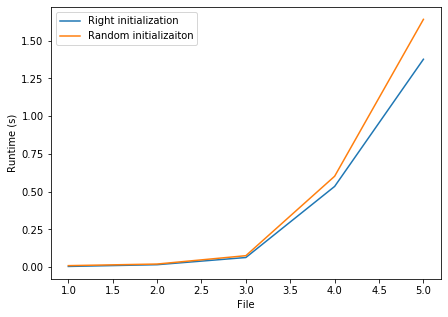

In [49]:
plt.figure(figsize=(7, 5))
x = range(1, 6)
plt.plot(x, df_results['p_i_runtime'], label='Right initialization')
plt.plot(x, df_results['p_runtime'], label='Random initializaiton')
# plt.yscale('log')
plt.xlabel('File')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()

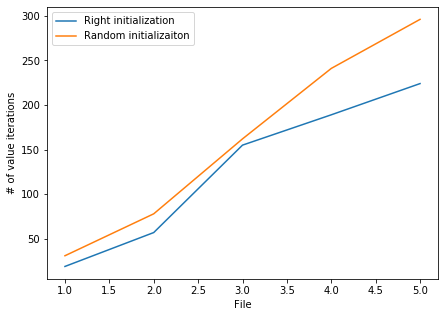

In [50]:
plt.figure(figsize=(7, 5))
x = range(1, 6)
plt.plot(x, df_results['p_i_n_v_iter'], label='Right initialization')
plt.plot(x, df_results['p_n_v_iter'], label='Random initializaiton')
# plt.yscale('log')
plt.xlabel('File')
plt.ylabel('# of value iterations')
plt.legend()
plt.show()

In [61]:
df_results = pd.DataFrame(columns=['board_size', 'p_u_n_v_iter', 'p_u_n_p_iter', 'p_u_runtime', 'p_n_v_iter', 'p_n_p_iter', 'p_runtime'])
for i in range(1, 6):

    b_size, p_u_n_v_iter, p_u_n_p_iter, p_u_runtime = PolicyIteration(
        '../inputs/i{}.txt'.format(i), 
        threshold=0.01,
#         init_policy_direction=1,
        improve_p_with_v=True,
        use_arrow=True,
        verbose=False
    ).run()
    
    b_size, p_n_v_iter, p_n_p_iter, p_runtime = PolicyIteration(
        '../inputs/i{}.txt'.format(i), 
        threshold=0.01, 
#         init_policy_direction=1,
        use_arrow=True,
        verbose=False
    ).run()
    
    df_results = df_results.append(pd.DataFrame({
        'board_size': [b_size], 
        'p_u_n_v_iter': [p_u_n_v_iter], 
        'p_u_n_p_iter': [p_u_n_p_iter], 
        'p_u_runtime': [p_u_runtime], 
        'p_n_v_iter': [p_n_v_iter], 
        'p_n_p_iter': [p_n_p_iter],
        'p_runtime': [p_runtime]
    }))

4  30.72474  34.94741  39.74704  ...  163.25293  185.59678  210.99616   
25  34.72337  39.53309  44.99722  ...  185.53620  210.95484  239.84510   
26  38.82575  44.33138  50.58417  ...  210.62171  239.58503  272.49636   
27  42.02282  48.36440  55.69957  ...  238.02485  271.13016  308.76382   
28  41.17920  47.45434  55.18861  ...  265.05759  302.86169  345.99723   
29  35.88916  37.39715   0.00000  ...  284.16589  326.02191  374.19775   

           23         24         25         26         27         28  \
0   429.69473  493.68871  567.56636  652.97107  751.86185  866.58996   
1   395.18152  451.21051  514.95795  587.36823  669.43901  762.18738   
2   351.52694  400.09780  455.24280  517.83051  588.85034  669.43901   
3   309.89105  352.37816  400.65133  455.50133  517.83051  587.36823   
4   272.68163  310.00444  352.42798  400.65133  455.24280  514.95795   
5   239.86932  272.69184  310.00444  352.37816  400.09780  451.21051   
6   210.99834  239.86932  272.68163  309.89105  351.

In [62]:
df_results = df_results.set_index(['board_size'])
df_results.to_csv('../results/results_3.csv', float_format='%.5f')
df_results

,p_u_n_v_iter,p_u_n_p_iter,p_u_runtime,p_n_v_iter,p_n_p_iter,p_runtime
board_size,,,,,,
6,26,4,0.01373,32,2,0.00672
7,44,3,0.01787,68,4,0.01475
10,156,4,0.07598,187,4,0.08377
20,237,8,0.73735,261,25,0.82293
30,231,9,1.75129,442,21,2.63338


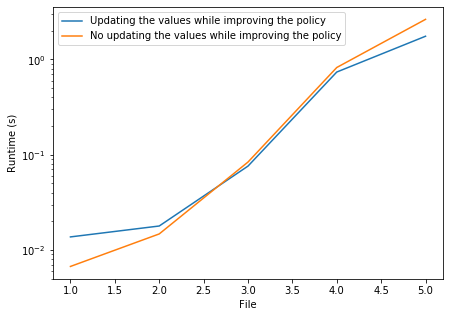

In [63]:
plt.figure(figsize=(7, 5))
x = range(1, 6)
plt.plot(x, df_results['p_u_runtime'], label='Updating the values while improving the policy')
plt.plot(x, df_results['p_runtime'], label='No updating the values while improving the policy')
plt.yscale('log')
plt.xlabel('File')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()

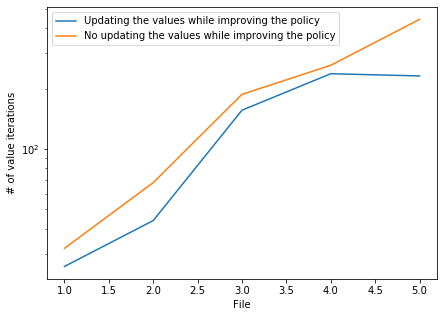

In [64]:
plt.figure(figsize=(7, 5))
x = range(1, 6)
plt.plot(x, df_results['p_u_n_v_iter'], label='Updating the values while improving the policy')
plt.plot(x, df_results['p_n_v_iter'], label='No updating the values while improving the policy')
plt.yscale('log')
plt.xlabel('File')
plt.ylabel('# of value iterations')
plt.legend()
plt.show()